In [0]:
!pip install qiskit

     |████████████████████████████████| 2.9MB 1.4MB/s 
     |████████████████████████████████| 23.0MB 1.2MB/s 
     |████████████████████████████████| 143kB 63.1MB/s 
     |████████████████████████████████| 102kB 13.2MB/s 
     |████████████████████████████████| 1.8MB 45.5MB/s 
     |████████████████████████████████| 51kB 6.8MB/s 
     |████████████████████████████████| 51kB 7.3MB/s 
     |████████████████████████████████| 5.6MB 42.0MB/s 
     |████████████████████████████████| 153kB 41.4MB/s 
     |████████████████████████████████| 71kB 9.4MB/s 
     |████████████████████████████████| 51kB 7.1MB/s 
     |████████████████████████████████| 24.3MB 1.2MB/s 
     |████████████████████████████████| 573kB 57.0MB/s 
     |████████████████████████████████| 2.3MB 44.1MB/s 
  Created wheel for qiskit: filename=qiskit-0.16.2-cp36-none-any.whl size=2898 sha256=20614f324dcddbc75d6ea9e5dab5bf0601078c3b19f5fde1912e3f87a520d895
  Stored in directory: /root/.cache/pip/wheels/8d/eb/5a/ce0d4fa7714b1b698c

In [0]:
import qiskit
qiskit.__version__


'0.12.0'

In [0]:
import numpy as np
from qiskit import(
  QuantumCircuit,
  execute,
  Aer)
from qiskit.visualization import plot_histogram

In [0]:
import cv2 
#img = cv2.imread('lenna_by.png', 0) 
img = cv2.imread('baboon.png', 0) 
kernel =cv2.getStructuringElement(cv2.MORPH_RECT,(2,2))

scale_percent = 25 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)

img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA) 
ret, img = cv2.threshold(img,127,512,cv2.THRESH_BINARY)

#img= img/255
#img= img.astype(int)


#img_erosion = cv2.erode(img, kernel, iterations=1) 
img_dilation= cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
img_erosion = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
print("kernel:")
print(kernel ) 
print()
print()

print( "resultado de la erosion")
print( img_erosion)
print()
print()

print( "resultado de la dilatacion")
print( img_dilation)

print(width)

kernel:
[[1 1]
 [1 1]]


resultado de la erosion
[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ... 255   0   0]
 ...
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 [  0   0 255 ...   0   0   0]]


resultado de la dilatacion
[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 [  0   0 255 ...   0   0   0]]
128


In [0]:
import cv2 
#imagen_entrada = cv2.imread('lenna_by.png', 0) 
imagen_entrada = cv2.imread('baboon.png',0)

scale_percent = 25 # percent of original size
width = int(imagen_entrada.shape[1] * scale_percent / 100)
height = int(imagen_entrada.shape[0] * scale_percent / 100)
dim = (width, height)

imagen_entrada = cv2.resize(imagen_entrada, dim, interpolation = cv2.INTER_AREA) 
ret, imagen_entrada = cv2.threshold(imagen_entrada,127,512,cv2.THRESH_BINARY)

imagen_entrada= imagen_entrada/255
imagen_entrada= imagen_entrada.astype(int)

a = np.zeros(len(imagen_entrada), dtype = int).reshape(len(imagen_entrada),1)
imagen_entrada = np.concatenate((a, imagen_entrada), axis=1)

a = np.zeros(len(imagen_entrada[0]), dtype = int).reshape(1,len(imagen_entrada[0]))
imagen_entrada = np.concatenate((a, imagen_entrada), axis=0)


# para agregar columnas de ceros es iniciar uno a la iquierda y luego uno a la derecha,  y asíí hasta tener  n-1 del tamaño de la imagen de ancho
print(imagen_entrada, len(imagen_entrada),len(imagen_entrada[0]))
#salidas erosion y dilatacion
erosion= []
dilatacion = []


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 1 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]] 129 129


In [0]:
def compuerta(circuit,a,b,c):
  circuit.x(a)
  circuit.toffoli(a,b,c)
  circuit.cx(c, b)
  #circuit.x(a)
  circuit.cx(a,c)
  #circuit.cx(a,b)



In [0]:
def twoGate(circuit,imagen_entrada,i,j,a,b,c,d,e,f,g,x0,x1):
  if imagen_entrada[i][j] == 1:
    circuit.x(a)
  if x0 == 1:
    circuit.x(b)
  elif x0 == 2:
    circuit.h(b)
#    circuit.s(b)
#    circuit.h(b)
  if imagen_entrada[i][j+1] == 1:
    circuit.x(d)
  if x1 == 1:
    circuit.x(e)
  elif x1 == 2:
    circuit.h(e)
    # circuit.h(b)
 #   circuit.s(e)
 #   circuit.h(e)

  compuerta(circuit,a,b,c)
  compuerta(circuit,d,e,f)
  compuerta(circuit,b,e,g) 


In [0]:
import time
start_time = time.time()

In [0]:
for i in range(len(imagen_entrada)-1):
  for j in range(len(imagen_entrada[0])-1):
    # Use Aer's qasm_simulator
    simulator = Aer.get_backend('qasm_simulator')

    # Create a Quantum Circuit acting on the q register
    circuit = QuantumCircuit(16, 2)
    



    twoGate(circuit,imagen_entrada,i,j,0,1,2,3,4,5,6,2,2) 
    twoGate(circuit,imagen_entrada,i+1,j,7,8,9,10,11,12,13,2,2) 

    compuerta(circuit,6,13,14)
    compuerta(circuit,4,11,15)

    
    


    #circuit.t(11)
    #circuit.t(14)
    # Map the quantum measurement to the classical bits
    circuit.measure([11,14], [0,1])

    # Execute the circuit on the qasm simulator
    job = execute(circuit, simulator, shots=160000)

    # Grab results from the job
    result = job.result()

    # Returns counts
    counts = result.get_counts(circuit)
    #print("max",max(counts))
    b = max(counts)
    #b = str(counts)[2:4]
    #print( b, counts)
    #b = a[3:8]
    #print("\nCount results:",(counts),b)
    if b == "00":
      erosion.append(0)
      dilatacion.append(0)
    elif b == "01":
      erosion.append(0)
      dilatacion.append(1)
    elif b == "10":
      erosion.append(1)
      dilatacion.append(0)
    elif b == "11":
      erosion.append(1)
      dilatacion.append(1)
    #print(erosion)
    #print(dilatacion)
# Draw the circuit


# Plot a histogram
#plot_histogram(counts)


In [0]:
print("--- %s seconds ---" % (time.time() - start_time))

--- 7222.001822948456 seconds ---


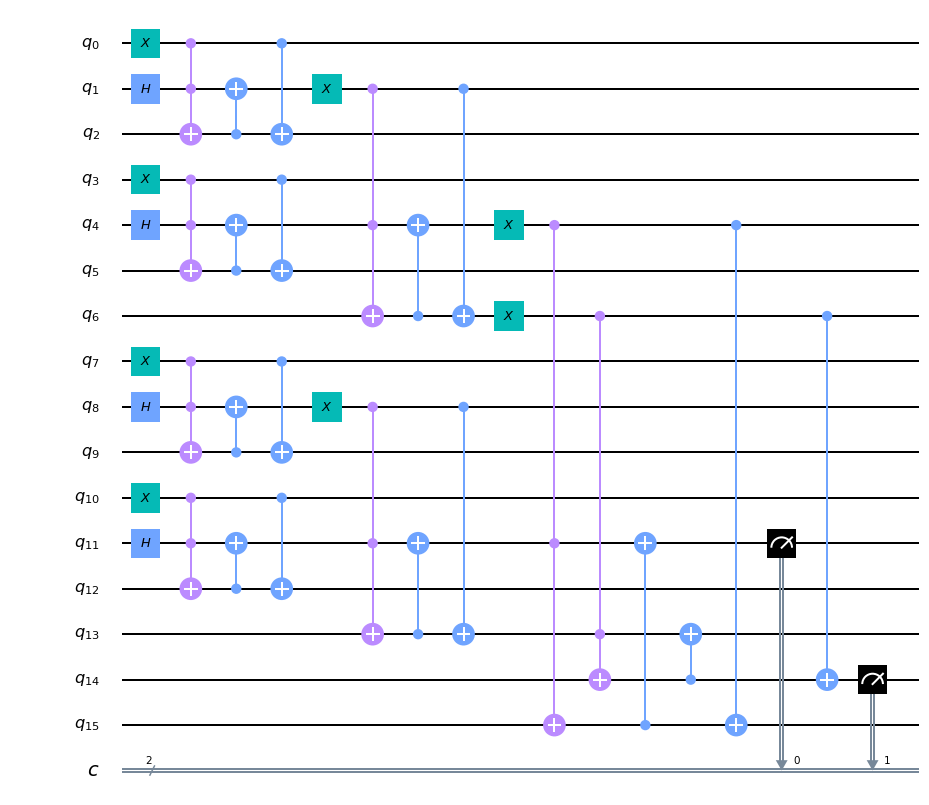

In [0]:
%matplotlib inline
circuit.draw(output="mpl")

In [0]:
x = dilatacion
x = np.array(x).reshape(128,128)
#x = np.delete(x, [6], axis=1)
print("dilatacion")
print()
print(x)


y = erosion
y = np.array(y).reshape(128,128)
#y = np.delete(y, [6], axis=1)
print("erosion")
print()
print(y)


dilatacion

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 1 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
erosion

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 1 1 ... 0 0 0]
 [0 1 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


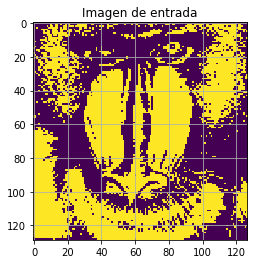

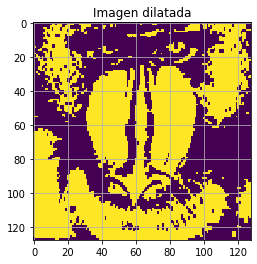

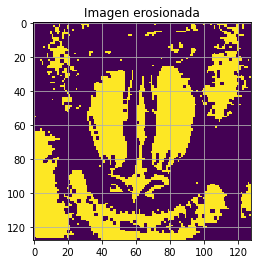

In [0]:
from pylab import *
#print("Imagen de entrada")
figure(1)
title('Imagen de entrada')

imagen_entrada_2 = np.delete(imagen_entrada, [0,7], axis=1)


imshow(imagen_entrada_2, interpolation='nearest')
grid(True)

#print("Imagen dilatada")
figure(2)
title('Imagen dilatada')
imshow(y, interpolation='nearest')
grid(True)

#print("Imagen erosionada")
figure(3)
title('Imagen erosionada')
imshow(x, interpolation='nearest')
grid(True)

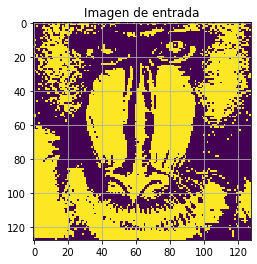

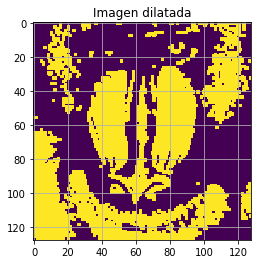

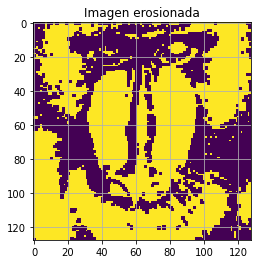

In [0]:
from pylab import *
#print("Imagen de entrada")
figure(1)
title('Imagen de entrada')

imshow(img, interpolation='nearest')
grid(True)

#print("Imagen dilatada")
figure(2)
title('Imagen dilatada')
imshow(img_dilation, interpolation='nearest')
grid(True)

#print("Imagen erosionada")
figure(3)
title('Imagen erosionada')
imshow(img_erosion, interpolation='nearest')
grid(True)

In [0]:
def mse(imageA, imageB):
	# the 'Mean Squared Error' between the two images is the
	# sum of the squared difference between the two images;
	# NOTE: the two images must have the same dimension
	err = np.sum((imageA.astype("int") - imageB.astype("int")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	
	# return the MSE, the lower the error, the more "similar"
	# the two images are
	return err

In [0]:
from skimage.metrics import structural_similarity as ssim

#imagen_entrada = cv2.imread('lenna_by.png', 0) 
#scale_percent = 25 # percent of original size
#width = int(imagen_entrada.shape[1] * scale_percent / 100)
#height = int(imagen_entrada.shape[0] * scale_percent / 100)
#dim = (width, height)

#inp = cv2.resize(imagen_entrada, dim, interpolation = cv2.INTER_AREA)



x= x*255
x= x.astype(int)

#a = np.zeros(len(x), dtype = int).reshape(len(x),1)
#x = np.concatenate((a, x), axis=1)
#a = np.zeros(len(x[0]), dtype = int).reshape(1,len(x[0]))
#x = np.concatenate((a, x), axis=0)

y = y*255
y = y.astype(int)





In [0]:
ms = mse(x,img_erosion)
s = ssim(x.astype("float"), img_erosion.astype("float"))
print(ms)

ms2 = mse(y,img_dilation)
s2 = ssim(y.astype("float"),img_dilation.astype("float"))
print(ms2)


ms3 = mse(x,img)
s3 = ssim(x.astype("float"),img.astype("float"))
print(ms3)

ms4 = mse(y,img)
s4 = ssim(y.astype("float"),img.astype("float"))
print(ms4)

15097.357177734375
7397.86376953125
10632.444763183594
7147.828674316406


In [0]:
import math
aux = (255**2)/ms
psrn = 10*math.log10(aux)
print(psrn,s)

aux2 = (255**2)/ms2
psrn2 = 10*math.log10(aux2)
print(psrn2,s2)


aux3 = (255**2)/ms3
psrn3 = 10*math.log10(aux3)
print(psrn3,s3)


aux4 = (255**2)/ms4
psrn4 = 10*math.log10(aux4)
print(psrn4,s4)


6.341794310303603 0.31881001346243815
9.439740312777742 0.5497789890600994
7.864472256875279 0.4334864224932673
9.589062264762035 0.5441250065560047
